## Observations and Insights

## Dependencies and starter code

In [1]:
#What was really interesting about this activity was that the timepoints did not have a unit of time. Through out
#this assignment this constantly tugged at me. Units of measurement are very important to any study. That was not
#what really got surprised me. What really surprised me was that after workign thriugh the analysis the units of
#were not absolutely necessary. With that being said I found the four most promising drugs by studyig the statsistical
#anaylsis. Capomulim and Ramicane has the smallest variance, standard deviation, and error. I had to look a little closer
#to find the other two drugs. I went with Ceftamin and Infubinol because even though they had a greater variance they
#both had smaller standard error and standard deviation in comparison to all others with Propiva being the next closest
#contender. The number of male and female mice were very close to being 50/50 elementing scewed results from the
#drugs effecting one sex more than the other. After looking at the IQR and quartiles of the four best drugs it was clear
#that among them Ramicane and Capomulin were the two best performers.

In [19]:
%matplotlib notebook

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata = "C:\\Users\\14704\\OneDrive\\Desktop\\gitlab\\GT-ATL-DATA-PT-12-2019-U-C\\Homework\\05-Matplotlib\\Instructions\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results = "C:\\Users\\14704\\OneDrive\\Desktop\\gitlab\\GT-ATL-DATA-PT-12-2019-U-C\\Homework\\05-Matplotlib\\Instructions\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata,study_results, on="Mouse ID")
mouse_data_complete.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [7]:
counts=mouse_data_complete['Drug Regimen'].value_counts()

## Summary statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen        
capomulin = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Capomulin", :]
capomulin = pd.DataFrame(capomulin)

ramicane = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ramicane", :]
ramicane = pd.DataFrame(ramicane)

ketapril = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ketapril", :]
ketapril = pd.DataFrame(ketapril)

naftisol = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Naftisol", :]
naftisol = pd.DataFrame(naftisol)

zoniferol = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Zoniferol", :]
zoniferol = pd.DataFrame(zoniferol)

placebo = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Placebo", :]
placebo = pd.DataFrame(placebo)

stelasyn = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Stelasyn", :]
stelasyn = pd.DataFrame(stelasyn)

infubinol = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Infubinol", :]
infubinol = pd.DataFrame(infubinol)

ceftamin = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Ceftamin", :]
ceftamin = pd.DataFrame(ceftamin)

propriva = mouse_data_complete.loc[mouse_data_complete["Drug Regimen"] == "Propriva", :]
propriva = pd.DataFrame(propriva)



In [9]:
#Calculate mean, meadian, variance, standard deviation, and standard error for each treatment
capomulin_mean=capomulin['Tumor Volume (mm3)'].mean()
capomulin_median=capomulin['Tumor Volume (mm3)'].median()
capomulin_variance=capomulin.loc[:,"Tumor Volume (mm3)"].var()
capomulin_std=capomulin.loc[:,"Tumor Volume (mm3)"].std()
capomulin_sem=capomulin.loc[:,"Tumor Volume (mm3)"].sem()

ramicane_mean=ramicane['Tumor Volume (mm3)'].mean()
ramicane_median=ramicane['Tumor Volume (mm3)'].median()
ramicane_variance=ramicane.loc[:,"Tumor Volume (mm3)"].var()
ramicane_std=ramicane.loc[:,"Tumor Volume (mm3)"].std()
ramicane_sem=ramicane.loc[:,"Tumor Volume (mm3)"].sem()

ketapril_mean=ketapril['Tumor Volume (mm3)'].mean()
ketapril_median=ketapril['Tumor Volume (mm3)'].median()
ketapril_variance=ketapril.loc[:,"Tumor Volume (mm3)"].var()
ketapril_std=ketapril.loc[:,"Tumor Volume (mm3)"].std()
ketapril_sem=ketapril.loc[:,"Tumor Volume (mm3)"].sem()

naftisol_mean=naftisol['Tumor Volume (mm3)'].mean()
naftisol_median=naftisol['Tumor Volume (mm3)'].median()
naftisol_variance=naftisol.loc[:,"Tumor Volume (mm3)"].var()
naftisol_std=naftisol.loc[:,"Tumor Volume (mm3)"].std()
naftisol_sem=naftisol.loc[:,"Tumor Volume (mm3)"].sem()

zoniferol_mean=zoniferol['Tumor Volume (mm3)'].mean()
zoniferol_median=zoniferol['Tumor Volume (mm3)'].median()
zoniferol_variance=zoniferol.loc[:,"Tumor Volume (mm3)"].var()
zoniferol_std=zoniferol.loc[:,"Tumor Volume (mm3)"].std()
zoniferol_sem=zoniferol.loc[:,"Tumor Volume (mm3)"].sem()

placebo_mean=placebo['Tumor Volume (mm3)'].mean()
placebo_median=placebo['Tumor Volume (mm3)'].median()
placebo_variance=placebo.loc[:,"Tumor Volume (mm3)"].var()
placebo_std=placebo.loc[:,"Tumor Volume (mm3)"].std()
placebo_sem=placebo.loc[:,"Tumor Volume (mm3)"].sem()

stelasyn_mean=stelasyn['Tumor Volume (mm3)'].mean()
stelasyn_median=stelasyn['Tumor Volume (mm3)'].median()
stelasyn_variance=stelasyn.loc[:,"Tumor Volume (mm3)"].var()
stelasyn_std=stelasyn.loc[:,"Tumor Volume (mm3)"].std()
stelasyn_sem=stelasyn.loc[:,"Tumor Volume (mm3)"].sem()

infubinol_mean=infubinol['Tumor Volume (mm3)'].mean()
infubinol_median=infubinol['Tumor Volume (mm3)'].median()
infubinol_variance=infubinol.loc[:,"Tumor Volume (mm3)"].var()
infubinol_std=infubinol.loc[:,"Tumor Volume (mm3)"].std()
infubinol_sem=infubinol.loc[:,"Tumor Volume (mm3)"].sem()

ceftamin_mean=ceftamin['Tumor Volume (mm3)'].mean()
ceftamin_median=ceftamin['Tumor Volume (mm3)'].median()
ceftamin_variance=ceftamin.loc[:,"Tumor Volume (mm3)"].var()
ceftamin_std=ceftamin.loc[:,"Tumor Volume (mm3)"].std()
ceftamin_sem=ceftamin.loc[:,"Tumor Volume (mm3)"].sem()

propriva_mean=propriva['Tumor Volume (mm3)'].mean()
propriva_median=propriva['Tumor Volume (mm3)'].median()
propriva_variance=propriva.loc[:,"Tumor Volume (mm3)"].var()
propriva_std=propriva.loc[:,"Tumor Volume (mm3)"].std()
propriva_sem=propriva.loc[:,"Tumor Volume (mm3)"].sem()


In [10]:
#Create data frame with summary statistics table
drug_regimen_analysis = pd.DataFrame(
    {"drug regimen": ["Capomulin", "Ramicene","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol", "Ceftamin",
                     "Propriva"],
     "Mean": [capomulin_mean, ramicane_mean, ketapril_mean, naftisol_mean,zoniferol_mean, placebo_mean, stelasyn_mean,
             infubinol_mean,ceftamin_mean,propriva_mean],
     "Median": [capomulin_median, ramicane_median, ketapril_median, naftisol_median, zoniferol_median, placebo_median,
                stelasyn_median, infubinol_median, ceftamin_median, propriva_median],
     "Variance": [capomulin_variance, ramicane_variance, ketapril_variance, naftisol_variance, zoniferol_variance,
                 placebo_variance, stelasyn_variance, infubinol_variance, ceftamin_variance, propriva_variance],
     "Standard Deviation": [capomulin_std, ramicane_std, ketapril_std, naftisol_std, zoniferol_std, placebo_std,
                            stelasyn_std, infubinol_std, ceftamin_std, propriva_std],
     "Standard Error": [capomulin_sem, ramicane_sem, ketapril_sem, naftisol_sem, zoniferol_sem, placebo_sem, stelasyn_sem,
                       infubinol_sem, ceftamin_sem, propriva_sem]
     }
)
drug_regimen_analysis.head(11)

,drug regimen,Mean,Median,Variance,Standard Deviation,Standard Error
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ramicene,40.216745,40.673236,23.486704,4.846308,0.320955
2,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
3,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
4,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
7,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
8,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
9,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884


## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_and_tumors = mouse_data_complete["Drug Regimen"].value_counts()
regimen_and_tumors.plot(kind="bar", figsize=(20,3))

plt.title("Data Points")

plt.show()
plt.tight_layout()

In [ ]:
counts.head(16)

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = ["Capomulin", "Ramicene","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Infubinol", "Ceftamin",
                     "Propriva"]
number_of_trials = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(len(number_of_trials))
plt.bar(x_axis, number_of_trials, color="b", alpha = 0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(number_of_trials)+0.4)

plt.title("Number of Trials for Each Regimen Treatment")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Trials")


## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#mouse_data_complete['Sex'].value_counts()

df = pd.DataFrame({'sex': [958, 935],
                    },
                   index=['Male', 'Female'])
plot = df.plot.pie(y='sex', figsize=(5, 5))

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#mouse_data_complete['Sex'].value_counts()

sex = ["Males", "Females"]

sizes = [958, 935]

colors = ["lightskyblue", "lightcoral"]

plt.pie(sizes, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, outliers and boxplots

<IPython.core.display.Javascript object>


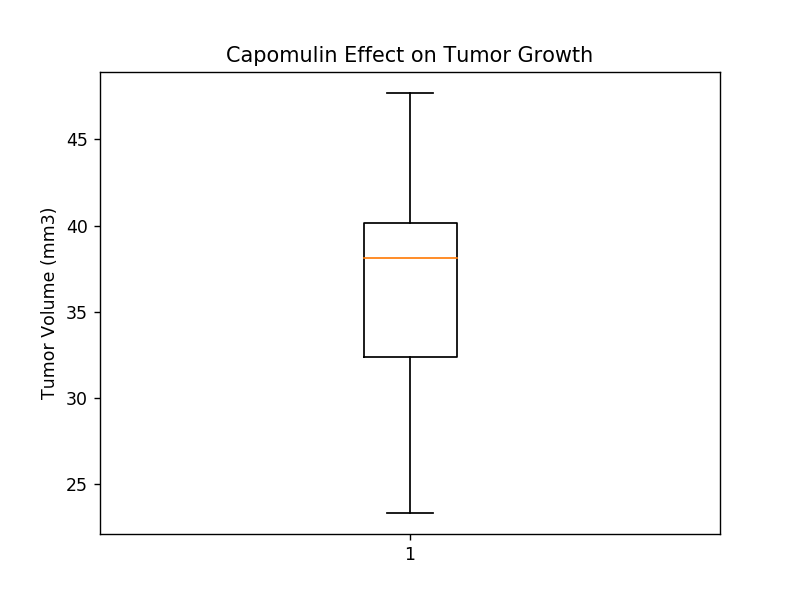

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
capomulin_sorted = capomulin.sort_values("Timepoint", ascending=False)
c_mouse_group = capomulin_sorted.groupby(["Mouse ID"])
c_top_tumors = c_mouse_group.first()
cap_tumors = c_top_tumors.loc[:,"Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Effect on Tumor Growth')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cap_tumors)
plt.show()




In [34]:
#Capomulin IQR
quartiles = cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin tumor size is: {lowerq}")
print(f"The upper quartile of capomulin tumor size is: {upperq}")
print(f"The interquartile range of capomulin tumor size is: {iqr}")
print(f"The the median of capomulin tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin tumor size is: 32.37735684
The upper quartile of capomulin tumor size is: 40.1592203
The interquartile range of capomulin tumor size is: 7.781863460000004
The the median of capomulin tumor size is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


<IPython.core.display.Javascript object>


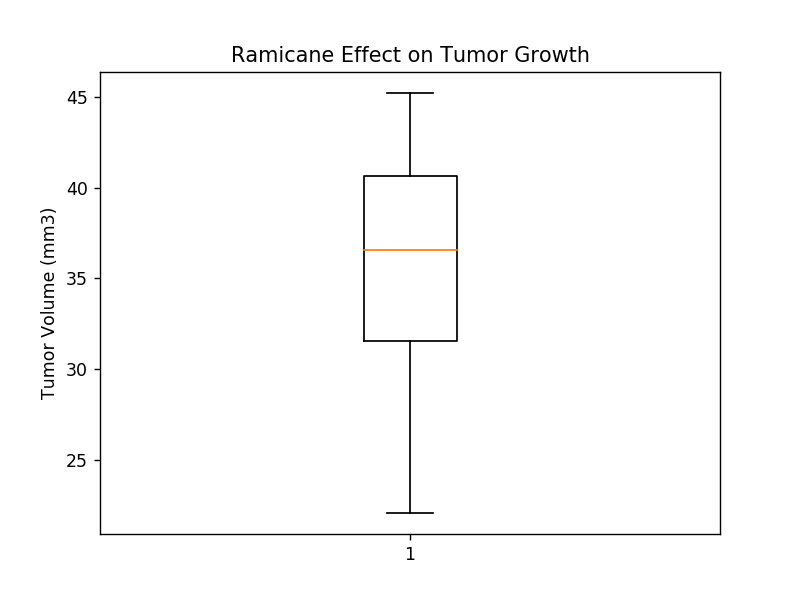

In [35]:
#ramicene boxplot
ramicane_sorted = ramicane.sort_values("Timepoint", ascending=False)
r_mouse_group = ramicane_sorted.groupby(["Mouse ID"])
r_top_tumors = r_mouse_group.first()
ram_tumors = r_top_tumors.loc[:,"Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Effect on Tumor Growth')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ram_tumors)
plt.show()

In [36]:
#Ramicane IQR
quartiles = ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane tumor size is: {lowerq}")
print(f"The upper quartile of ramicane tumor size is: {upperq}")
print(f"The interquartile range of ramicane tumor size is: {iqr}")
print(f"The the median of ramicane tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane tumor size is: 31.56046955
The upper quartile of ramicane tumor size is: 40.65900627
The interquartile range of ramicane tumor size is: 9.098536719999998
The the median of ramicane tumor size is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


<IPython.core.display.Javascript object>


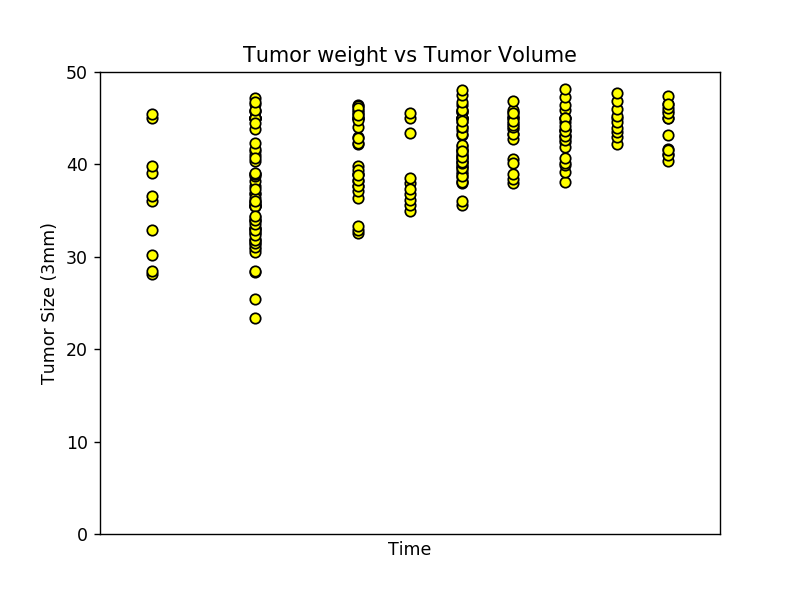

In [14]:
#Infubinol boxplot
infubinol_sorted = infubinol.sort_values("Timepoint", ascending=False)
i_mouse_group = infubinol_sorted.groupby(["Mouse ID"])
i_top_tumors = i_mouse_group.first()
inf_tumors = i_top_tumors.loc[:,"Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Effect on Tumor Growth')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(inf_tumors)
plt.show()

In [39]:
#infubinol IQR 
quartiles = inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol tumor size is: {lowerq}")
print(f"The upper quartile of infubinol tumor size is: {upperq}")
print(f"The interquartile range of infubinol tumor size is: {iqr}")
print(f"The the median of infubinol tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol tumor size is: 54.04860769
The upper quartile of infubinol tumor size is: 65.52574285
The interquartile range of infubinol tumor size is: 11.477135160000003
The the median of infubinol tumor size is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


<IPython.core.display.Javascript object>


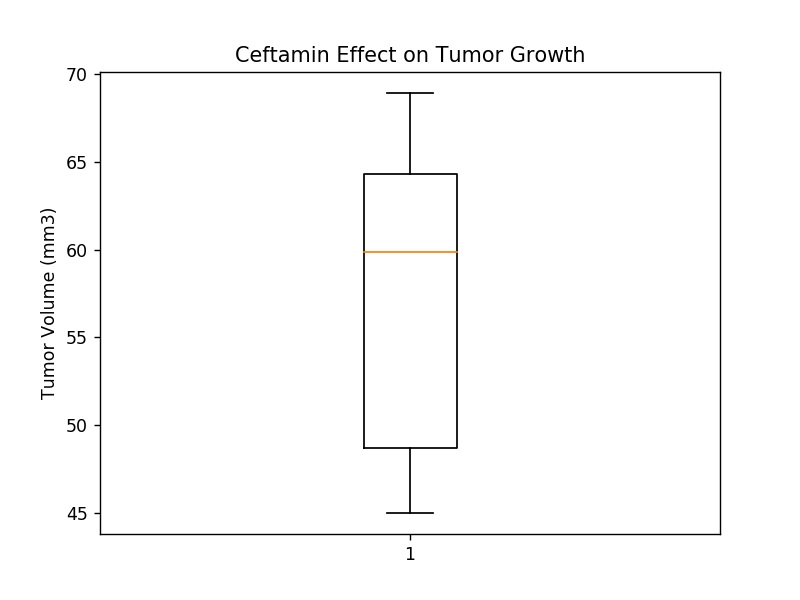

In [40]:
#Ceftamin boxplot
ceftamin_sorted = ceftamin.sort_values("Timepoint", ascending=False)
ce_mouse_group = ceftamin_sorted.groupby(["Mouse ID"])
ce_top_tumors = ce_mouse_group.first()
ceft_tumors = ce_top_tumors.loc[:,"Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Effect on Tumor Growth')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceft_tumors)
plt.show()


In [41]:
#Ceftamin IQR
quartiles = ceft_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin tumor size is: {lowerq}")
print(f"The upper quartile of ceftamin tumor size is: {upperq}")
print(f"The interquartile range of ceftamin tumor size is: {iqr}")
print(f"The the median of ceftamin tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin tumor size is: 48.72207785
The upper quartile of ceftamin tumor size is: 64.29983003
The interquartile range of ceftamin tumor size is: 15.577752179999997
The the median of ceftamin tumor size is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

<IPython.core.display.Javascript object>


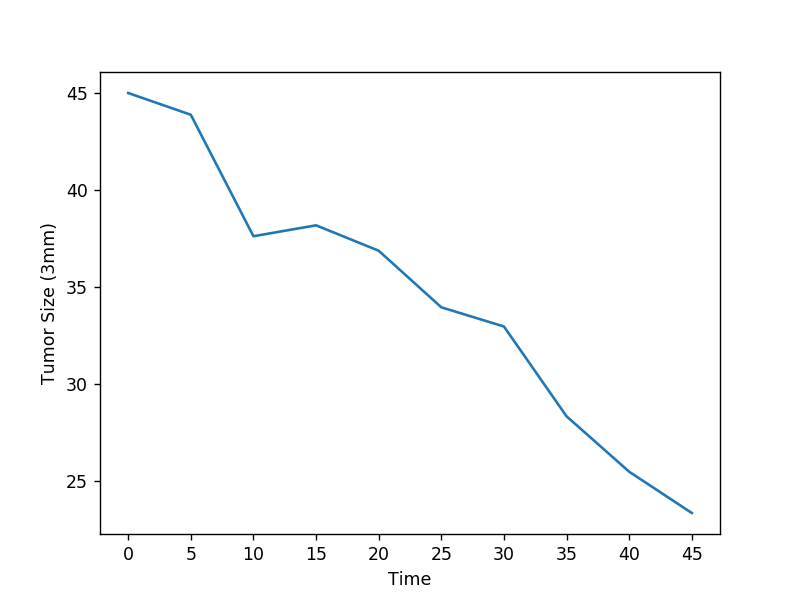

Text(0, 0.5, 'Tumor Size (3mm)')

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time = ["0","5","10","15","20","25","30","35","40","45"]
tumor_size = [45.000000, 43.878496, 37.614948, 38.177232, 36.866876, 33.949940, 32.959671, 28.328531, 25.472143, 23.343598]
plt.plot(time, tumor_size)
plt.show()
plt.xlabel("Time")
plt.ylabel("Tumor Size (3mm)")

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capomulin.head()
mouse_weight = capomulin["Weight (g)"]
m_tumor_capomulin = capomulin["Tumor Volume (mm3)"]

plt.scatter(mouse_weight, m_tumor_capomulin, marker="o", facecolors="yellow", edgecolors="black")
plt.ylim(0,50)
plt.xlim(14,26)
plt.title("Tumor weight vs Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Tumor Size(Volume)")

Text(58.777777777777786, 0.5, 'Tumor Size(Volume)')

In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,m_tumor_capomulin)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


In [ ]:
x_values = mouse_weight
y_values = m_tumor_capomulin
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.show()